<a href="https://colab.research.google.com/github/joseogg/weibull-distribution/blob/main/Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in power


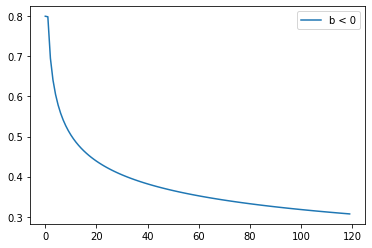

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


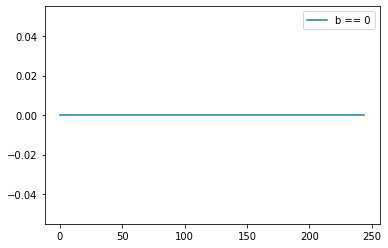

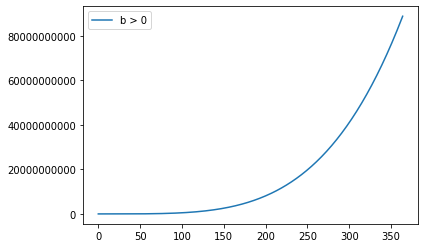

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in multiply


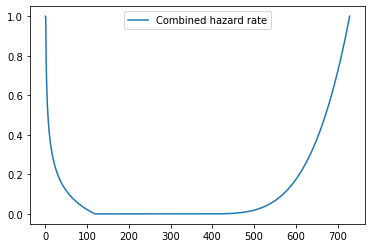

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

left_beta = 0.8
right_beta = 5          

# life span of two years = 120 + 245 + 365

early_life_days = 120
useful_life_days = 245
wearout_life_days = 365

max_early_life_failure_rate = 0.2
max_useful_life_failure_rate = 0.01
max_wearout_life_failure_rate = 0.4

x_early_life = np.linspace(0, early_life_days, early_life_days)
x_useful_life = np.linspace(0, useful_life_days, useful_life_days)
x_wearout_life = np.linspace(0, wearout_life_days, wearout_life_days)

# formula extracted from https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm
# Heckert, N. A., & Filliben, J. J. (2003). NIST/SEMATECH e-Handbook of Statistical Methods; Chapter 1: Exploratory Data Analysis.

def weibull_hazard(x, b): 
    vector = b*(x**(b-1))
    vector[vector == float('inf')] = b
    vector[np.isnan(vector)] = 0
    return vector

def scale_min_max(vector):
    minimum = min(vector)
    maximum = max(vector)
    if (maximum - minimum) == 0:
        return vector        
    vector = (vector - minimum)/(maximum - minimum)
    return vector

                    
plt.plot(weibull_hazard(x_early_life, left_beta), label='b < 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_useful_life, 0), label='b == 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_wearout_life, right_beta), label='b > 0')
plt.ticklabel_format(style='plain')    
plt.legend()
plt.show()

bathtub = np.concatenate((scale_min_max(weibull_hazard(x_early_life, left_beta)), 
                         scale_min_max(weibull_hazard(x_useful_life, 0)),
                         scale_min_max(weibull_hazard(x_wearout_life, right_beta))))

plt.plot(bathtub, label='Combined hazard rate')
plt.legend()
plt.show()



In [ ]:
from random import random

def check_over_for_failure(day,
                           bathtub, 
                           max_early_life_failure_rate,
                           max_useful_life_failure_rate,
                           max_wearout_life_failure_rate,
                           early_life_days,
                           useful_life_days,
                           wearout_life_days):

    if day < early_life_days:
        if random() < (max_early_life_failure_rate * bathtub[day]):
            return 1 # early life failure
    elif day < useful_life_days:
        if random() < max_useful_life_failure_rate:
            return 1 # useful life failure
    else: 
        if day >= bathtub.size: # day >= max_days
            day = bathtub.size - 1
        if random() < (max_wearout_life_failure_rate * bathtub[day]):
            return 1 # wearout life failure
    return 0 # does not fail

failures_over_two_years = []
for day in range(730):
    result = check_over_for_failure(day,
                                    bathtub,
                                    max_early_life_failure_rate,
                                    max_useful_life_failure_rate,
                                    max_wearout_life_failure_rate,
                                    early_life_days,
                                    useful_life_days,
                                    wearout_life_days)
    failures_over_two_years.append(result)
    
print(np.array(failures_over_two_years))

[1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 